### Einführung Regressionsanalyse

In [3]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d

[[1.00000000e+00 8.40000000e+01 7.05600000e+03 5.92704000e+05]
 [1.00000000e+00 1.32300000e+03 1.75032900e+06 2.31568527e+09]
 [1.00000000e+00 2.82000000e+02 7.95240000e+04 2.24257680e+07]
 [1.00000000e+00 9.57000000e+02 9.15849000e+05 8.76467493e+08]
 [1.00000000e+00 1.38600000e+03 1.92099600e+06 2.66250046e+09]
 [1.00000000e+00 8.10000000e+02 6.56100000e+05 5.31441000e+08]
 [1.00000000e+00 3.96000000e+02 1.56816000e+05 6.20991360e+07]
 [1.00000000e+00 4.74000000e+02 2.24676000e+05 1.06496424e+08]
 [1.00000000e+00 5.01000000e+02 2.51001000e+05 1.25751501e+08]
 [1.00000000e+00 6.60000000e+02 4.35600000e+05 2.87496000e+08]
 [1.00000000e+00 1.26000000e+03 1.58760000e+06 2.00037600e+09]
 [1.00000000e+00 1.00500000e+03 1.01002500e+06 1.01507512e+09]
 [1.00000000e+00 1.11000000e+03 1.23210000e+06 1.36763100e+09]
 [1.00000000e+00 1.29000000e+03 1.66410000e+06 2.14668900e+09]]


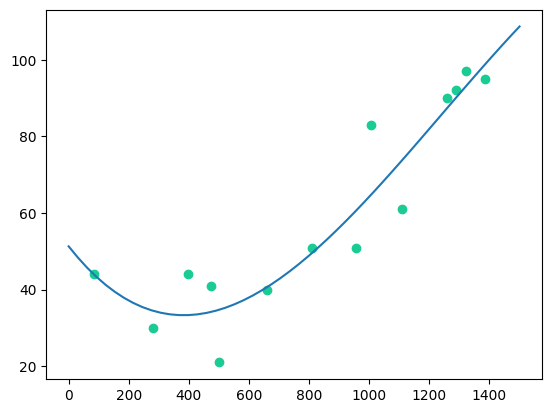

In [4]:
# 1D x

x = np.array([84,1323,282,957,1386,810,396,474,501,660,1260,1005,1110,1290])
y = np.array([44,97,30,51,95,51,44,41,21,40,90,83,61,92])
x_axis = np.linspace(0,1500)  

poly = PolynomialFeatures(3) 
x_poly = poly.fit_transform(x.reshape(-1, 1)) # Bei Grad 2: [1, x, x^2]

print(x_poly)


model = LinearRegression()
model.fit(x_poly,y)

plt.scatter(x,y,c="#1acc94")
plt.plot(x_axis,model.predict(poly.transform(x_axis.reshape(-1, 1))))

[[1.000000e+00 8.400000e+01 2.000000e+00 7.056000e+03 1.680000e+02
  4.000000e+00]
 [1.000000e+00 1.323000e+03 4.000000e+00 1.750329e+06 5.292000e+03
  1.600000e+01]
 [1.000000e+00 2.820000e+02 3.000000e+00 7.952400e+04 8.460000e+02
  9.000000e+00]
 [1.000000e+00 9.570000e+02 3.000000e+00 9.158490e+05 2.871000e+03
  9.000000e+00]
 [1.000000e+00 1.386000e+03 4.000000e+00 1.920996e+06 5.544000e+03
  1.600000e+01]
 [1.000000e+00 8.100000e+02 4.000000e+00 6.561000e+05 3.240000e+03
  1.600000e+01]
 [1.000000e+00 3.960000e+02 2.000000e+00 1.568160e+05 7.920000e+02
  4.000000e+00]
 [1.000000e+00 4.740000e+02 3.000000e+00 2.246760e+05 1.422000e+03
  9.000000e+00]
 [1.000000e+00 5.010000e+02 1.000000e+00 2.510010e+05 5.010000e+02
  1.000000e+00]
 [1.000000e+00 6.600000e+02 3.000000e+00 4.356000e+05 1.980000e+03
  9.000000e+00]
 [1.000000e+00 1.260000e+03 4.000000e+00 1.587600e+06 5.040000e+03
  1.600000e+01]
 [1.000000e+00 1.005000e+03 4.000000e+00 1.010025e+06 4.020000e+03
  1.600000e+01]
 [1.

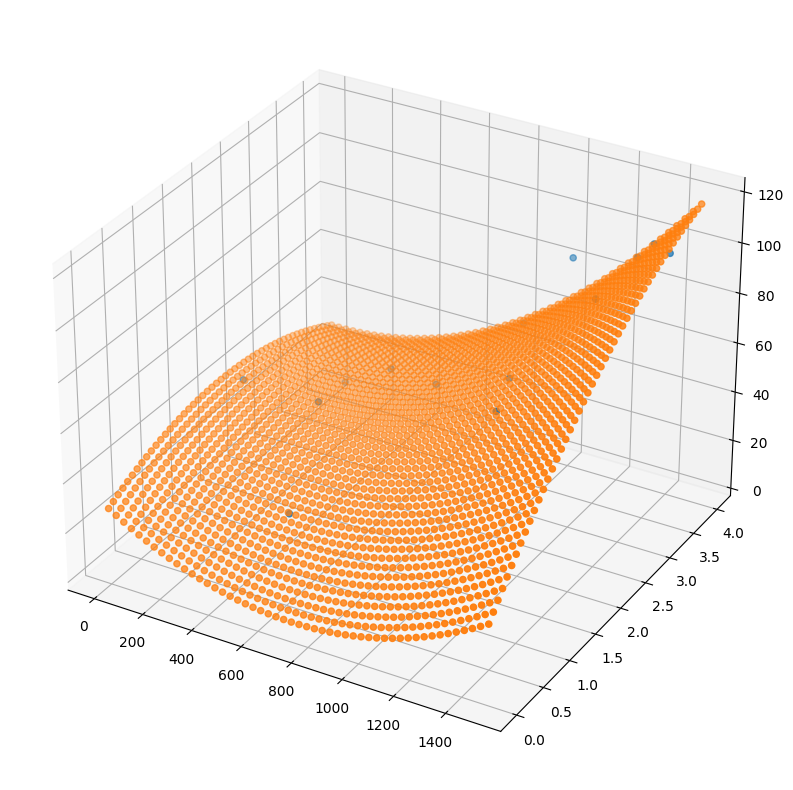

In [5]:
## 3D x 

x = np.array([[84, 2],[1323, 4],[282, 3],[957, 3],[1386, 4],[810, 4],[396, 2],[474, 3],[501, 1],[660, 3],[1260, 4],[1005, 4],[1110, 2],[1290, 3]])
y = np.array([44,97,30,51,95,51,44,41,21,40,90,83,61,92])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter3D(x.T[0], x.T[1], y)

# Modelling:

x_axis = np.linspace(0, 1500)
y_axis = np.linspace(0, 4)
x_mesh, y_mesh = np.meshgrid(x_axis, y_axis)
x_new = np.array([[[x, y] for x in x_axis] for y in y_axis])

poly = PolynomialFeatures(2)
x_poly = poly.fit_transform(x.reshape(-1,2)) # [1, x_1, x_2, x_1^2, x_1 * x_2, x_2^2].
print(x_poly)

model = LinearRegression()
model.fit(x_poly,y)


ax.scatter3D(x_mesh, y_mesh, model.predict(poly.transform(x_new.reshape(-1, 2))))